### Overview of the Titanic Dataset

The Titanic dataset includes demographics and passenger information from 891 of the 2,224 passengers and crew on board the Titanic.

### Key Features in the Dataset

The dataset includes several features that are commonly used to predict survival rates:

- **PassengerId**: An identifier for each traveler.
- **Survived**: Indicates if a passenger survived or not (0 = No, 1 = Yes).
- **Pclass**: Ticket class, a proxy for socio-economic status (1 = 1st, 2 = 2nd, 3 = 3rd).
- **Name**: The name of the passenger.
- **Sex**: The passenger's gender.
- **Age**: The passenger's age in years.
- **SibSp**: The number of siblings or spouses the passenger had aboard the Titanic.
- **Parch**: The number of parents or children the passenger had aboard the Titanic.
- **Ticket**: Ticket number.
- **Fare**: Passenger fare.
- **Cabin**: Cabin number.
- **Embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### Challenges

The dataset poses several challenges:
- Handling missing data, especially for the 'Age' and 'Cabin' features.
- Deciding how to encode categorical variables.
- Creating meaningful new features from existing data, such as deriving titles from names, which might give clues about the social status, age, and therefore survival probability.
- Balancing the model's complexity with its accuracy.

In [ ]:
# Import pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Viewing Data
titanic = pd.read_csv('/content/train.csv')

# Display the first few rows of the DataFrame
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Plot 1: Survival Rate by Passenger Class**


In [ ]:
# 1000 people, 600 -3Ac, 300 - 2Ac, 100 - 1Ac

# 80/100 = .8
# 200/300 = .66

Text(0.5, 1.0, 'Survival rate by passenger class')

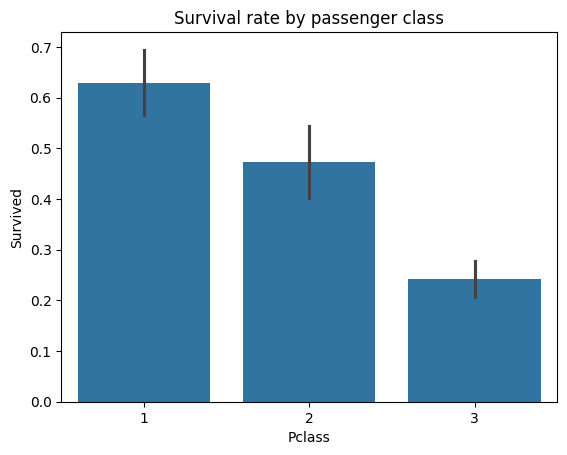

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Pclass", y="Survived", data=titanic)
plt.title("Survival rate by passenger class")

**Insight:** Higher classes (1st class) typically have higher survival rates, possibly due to better access to lifeboats and other safety mechanisms.

### **Plot 2: Age Distribution of Passengers by Survival**


<Axes: xlabel='Fare', ylabel='Count'>

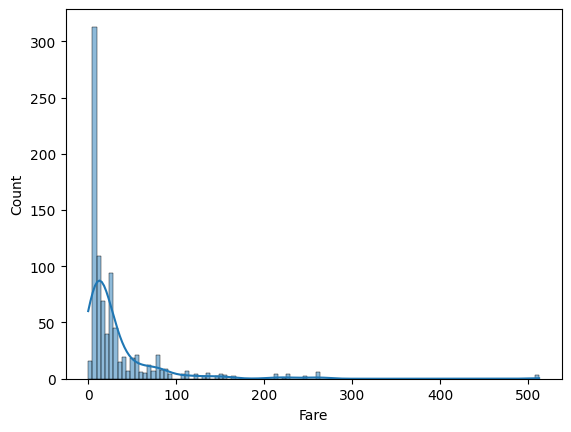

In [ ]:
sns.histplot(data= titanic , x= "Fare", kde=True)





**Insight:** Younger passengers tended to survive at higher rates than older passengers, with children having notably higher survival rates, indicating possible prioritization of children in rescue efforts.

### **Plot 3: Fare Distribution**

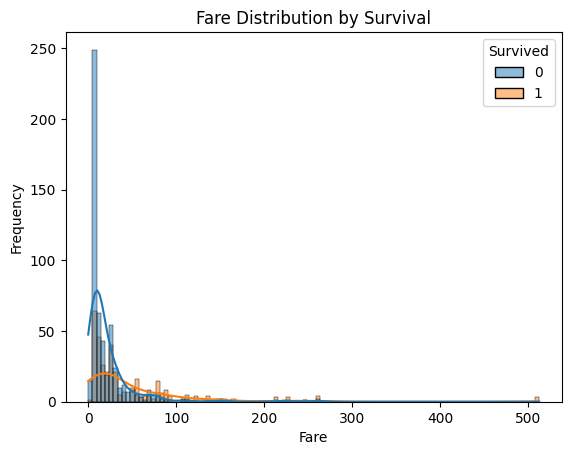

In [ ]:
sns.histplot(data=    , x=    , hue=     , kde=    )




**Insight:** Passengers who paid higher fares, which likely correlates with higher passenger class, had better survival rates. The fare distribution is right-skewed, showing that most passengers paid lower fares.

### **Plot 4: Count of Passengers by Embarkation Port**


Text(0.5, 1.0, 'Count of Passengers by Embarkation Port')

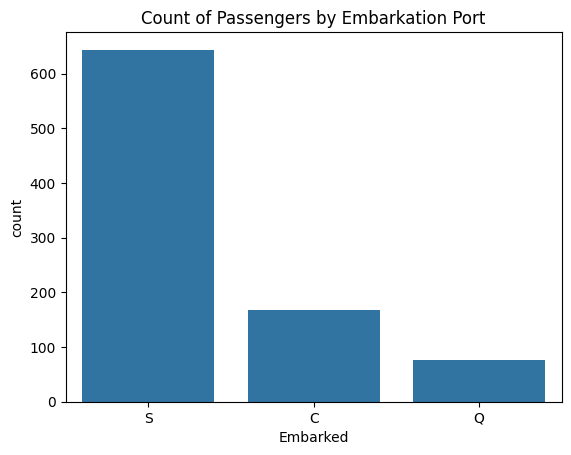

In [ ]:
# seaborn countplot
sns.countplot(data=titanic, x="Embarked")
plt.title("Count of Passengers by Embarkation Port")

In [ ]:
titanic["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
titanic.groupby("Embarked").size()

Embarked
C    168
Q     77
S    644
dtype: int64

**Insight:** Most passengers embarked from Southampton, which was the Titanic’s point of departure. This could influence survival rates and demographic patterns observed on board.

### **Plot 5: Boxplot of Ages by Class**

<Axes: xlabel='Pclass', ylabel='Age'>

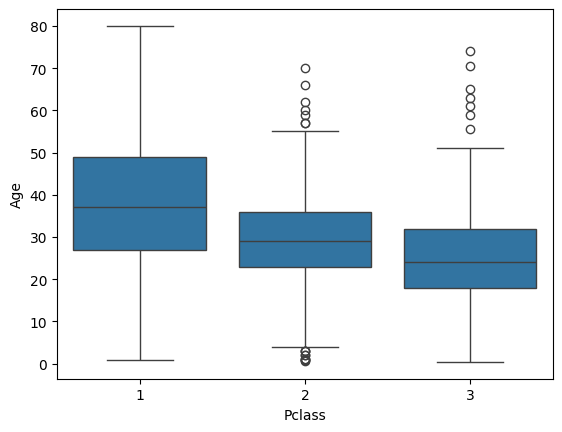

In [ ]:
# sns boxplot
sns.boxplot(x="Pclass", data=titanic,  y="Age")



In [ ]:
# 1, 1, 2, ......22, 23, 24, 22, 23, 25, 26, 24 , 28, 30, 32, 33, 30..........55, 60, 65, 70, 65

**Insight:** First class passengers tended to be older than those in third class, suggesting that wealthier, more established individuals were more likely to afford first-class accommodations.

### **Plot 6: Survival Rate by Gender and Class**

<Axes: xlabel='Pclass', ylabel='Survived'>

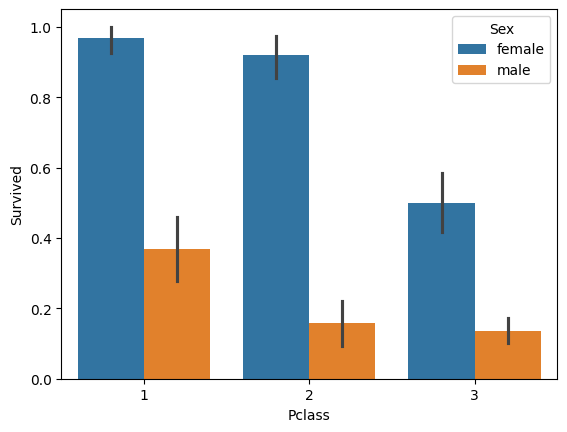

In [ ]:
sns.barplot(x='Pclass', y='Survived',hue='Sex',data=titanic)


**Insight:** This plot typically reveals that women had higher survival rates than men across all classes, with the highest survival rates among women in the first class, highlighting the "women and children first" policy and social norms of the era.

### **Plot 7: Embarkation by Fare and Age**

<Axes: xlabel='Age', ylabel='Fare'>

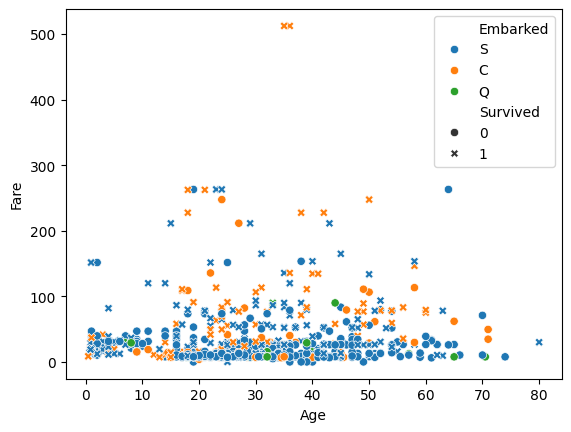

In [ ]:
sns.scatterplot(x="Age", y= "Fare" , hue="Embarked", style="Survived", data= titanic)




**Insight:** This plot can show if passengers from certain ports paid more and were older or younger, which may correlate with the economic conditions of those ports or the passenger strategies for securing Titanic tickets.

### **Plot 8: Deck Level and Survival**

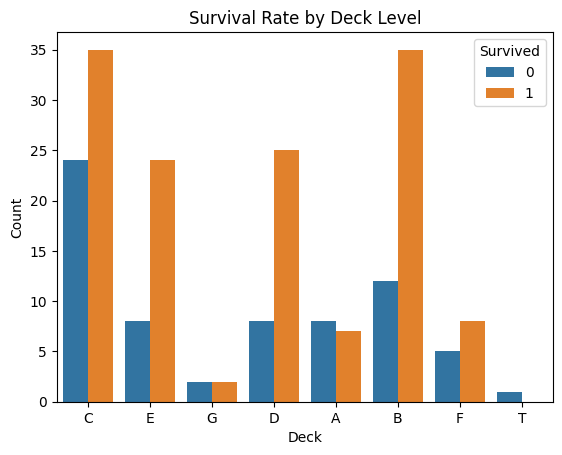

In [ ]:
# Assuming 'deck' has been extracted from the 'Cabin' column
# use titanic['Deck'] = titanic['Cabin'].str[0]

titanic['Deck'] = titanic['Cabin'].str[0]

sns.countplot(data = titanic, x='Deck', hue= 'Survived')


**Insight:** Passengers on higher decks may have had better access to lifeboats, thus higher survival rates, indicating the importance of cabin placement.



### **Plot 9: Family Size and Survival**

Text(0.5, 1.0, 'Survival Rate By Family Size')

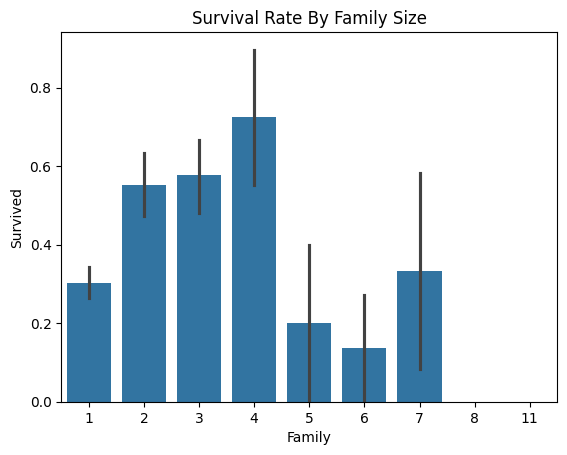

In [ ]:
titanic["Family"]=titanic["SibSp"]+titanic["Parch"] + 1

sns.barplot(data=titanic,x="Family",y="Survived")
plt.title("Survival Rate By Family Size")




**Insight:** Medium-sized families might have had higher survival rates due to better support systems, while those traveling alone or with very large families might have faced more challenges.



### **Plot 10: Age Distribution Within Survival and Class**

<Axes: xlabel='Pclass', ylabel='Age'>

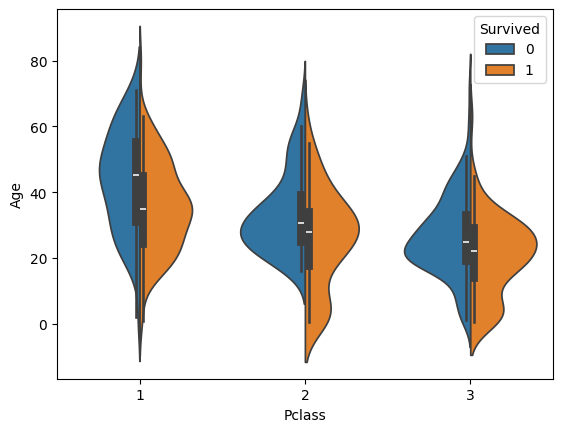

In [ ]:
# create violin plot
sns.violinplot(x= "Pclass" , y= "Age" , hue= "Survived", split=True , data=titanic)


**Insight:** This plot may reveal if younger or older passengers in certain classes were more likely to survive, possibly due to their physical ability, location of cabins relative to lifeboats, or the prioritization of rescue efforts.

### **Plot 11: Survival Probability by Age and Fare**

<Axes: xlabel='Age', ylabel='Fare'>

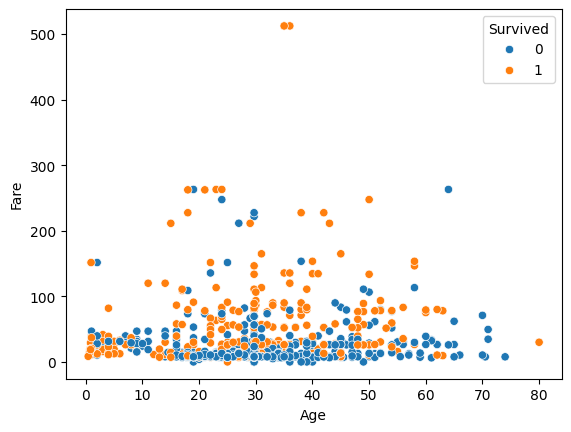

In [ ]:
# Scatter plot of Age vs Fare colored by Survival
sns.scatterplot(x= "Age" , y= "Fare"   , hue= "Survived"  , data=titanic.fillna({'Age': titanic['Age'].mean()}))




**Simple Insight:** The scatter plot can visually suggest that younger passengers and those who paid higher fares had better chances of survival.

### **Plot 12: Multivariate Analysis of Pclass, Age, and Survival**

In [ ]:
# univariate, bivariate, multivariate

<Axes: xlabel='Age', ylabel='Survived'>

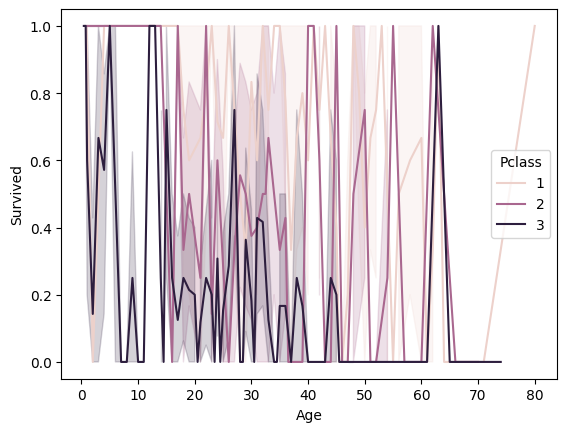

In [ ]:
# Line plot showing interaction of age and class on survival rates
sns.lineplot(x= "Age"  , y= "Survived"   , hue= "Pclass"  , data=  titanic)


**Simple Insight:** This plot helps in understanding how survival rates vary with age in different passenger classes, showing that younger passengers in higher classes generally had better survival probabilities.

### **Plot 13 : Network Analysis of Cabin Sharing**

In [ ]:
cabin_counts = titanic['Cabin'].value_counts()
cabin_counts

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Text(0.5, 0, 'No of passengers used cabin')

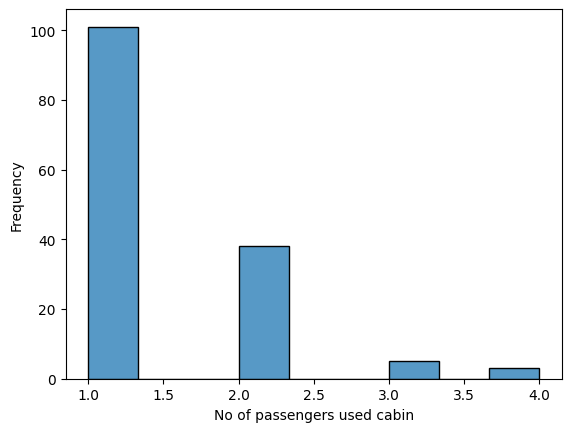

In [ ]:
# Count the number of passengers per cabin
cabin_counts = titanic['Cabin'].value_counts()

# Histogram of the number of passengers sharing cabins

sns.histplot(cabin_counts)
plt.ylabel("Frequency")
plt.xlabel("No of passengers used cabin")

**Simple Insight:** This histogram shows how frequently passengers shared cabins with different numbers of people, indicating that most cabins were shared by two or three passengers.